In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import activations
from tensorflow.keras import metrics
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import cifar10

import pandas as pd
import numpy as np

1. обучить рукописную сверточную нейронную сеть (с падением размера ядра свертки и последовательностью блоков свертка-пулинг (conv-pool)-(conv-pool)-...) на датасете cifar-10

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
print("""X_train shape: {}
X_test shape: {}
""".format(X_train.shape, X_test.shape))

X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)



In [4]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [5]:
X_train = X_train / 255
X_test = X_test / 255

In [6]:
x_input = keras.layers.Input((32, 32, 3))

In [7]:
metrics_history = []

In [8]:
#@title Текст заголовка по умолчанию
model = keras.Sequential()

model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (2, 2), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, 
                optimizer=optimizers.SGD(), 
                metrics=['accuracy'])



In [9]:
datagen = keras.preprocessing.image.ImageDataGenerator(featurewise_center=False,
                                                       samplewise_center=False,
                                                       featurewise_std_normalization=False,
                                                       samplewise_std_normalization=False,
                                                       zca_whitening=False, 
                                                       zca_epsilon=1e-06, 
                                                       rotation_range=10, 
                                                       width_shift_range=0.1,
                                                       height_shift_range=0.1,
                                                       shear_range=0., 
                                                       zoom_range=0.2, 
                                                       channel_shift_range=0.,
                                                       fill_mode='nearest',
                                                       cval=0.,
                                                       horizontal_flip=True,
                                                       vertical_flip=False,
                                                       rescale=None,
                                                       preprocessing_function=None,
                                                       data_format=None,
                                                       validation_split=0.0)


train_gen = datagen.flow(X_train, 
                          y_train,
                          batch_size=512)

# запуск data augmentation через fit_generator
history = model.fit(train_gen,
                    epochs=5,
                    validation_data=(X_test, y_test),
                    workers=4)

h = history.history

for key, values in h.items():
  h[key] = values[-1]

h['method'] = 'start'

metrics_history.append(h)

Epoch 1/5
98/98 [==============================] - 62s 305ms/step - loss: 2.3125 - accuracy: 0.1022 - val_loss: 2.2952 - val_accuracy: 0.1394
Epoch 2/5
98/98 [==============================] - 29s 292ms/step - loss: 2.2954 - accuracy: 0.1208 - val_loss: 2.2830 - val_accuracy: 0.1815
Epoch 3/5
98/98 [==============================] - 30s 291ms/step - loss: 2.2807 - accuracy: 0.1448 - val_loss: 2.2444 - val_accuracy: 0.2015
Epoch 4/5
98/98 [==============================] - 30s 291ms/step - loss: 2.2330 - accuracy: 0.1722 - val_loss: 2.1320 - val_accuracy: 0.2465
Epoch 5/5
98/98 [==============================] - 30s 290ms/step - loss: 2.1352 - accuracy: 0.2007 - val_loss: 2.0505 - val_accuracy: 0.2750


In [10]:
model = keras.Sequential()

model.add(layers.Conv2D(64, (3, 3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (2, 2), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, 
                optimizer=optimizers.SGD(), 
                metrics=['accuracy'])

datagen = keras.preprocessing.image.ImageDataGenerator(featurewise_center=False,
                                                       samplewise_center=False,
                                                       featurewise_std_normalization=False,
                                                       samplewise_std_normalization=False,
                                                       zca_whitening=False, 
                                                       zca_epsilon=1e-06, 
                                                       rotation_range=10, 
                                                       width_shift_range=0.1,
                                                       height_shift_range=0.1,
                                                       shear_range=0., 
                                                       zoom_range=0.2, 
                                                       channel_shift_range=0.,
                                                       fill_mode='nearest',
                                                       cval=0.,
                                                       horizontal_flip=True,
                                                       vertical_flip=False,
                                                       rescale=None,
                                                       preprocessing_function=None,
                                                       data_format=None,
                                                       validation_split=0.0)


train_gen = datagen.flow(X_train, 
                          y_train,
                          batch_size=512)

# запуск data augmentation через fit_generator
history = model.fit(train_gen,
                    epochs=5,
                    validation_data=(X_test, y_test),
                    workers=4)

h = history.history

for key, values in h.items():
  h[key] = values[-1]

h['method'] = 'more filters'

metrics_history.append(h)

Epoch 1/5
98/98 [==============================] - 32s 295ms/step - loss: 2.3000 - accuracy: 0.1097 - val_loss: 2.2820 - val_accuracy: 0.1544
Epoch 2/5
98/98 [==============================] - 30s 294ms/step - loss: 2.2788 - accuracy: 0.1425 - val_loss: 2.2328 - val_accuracy: 0.1839
Epoch 3/5
98/98 [==============================] - 30s 295ms/step - loss: 2.2177 - accuracy: 0.1838 - val_loss: 2.0989 - val_accuracy: 0.2425
Epoch 4/5
98/98 [==============================] - 30s 295ms/step - loss: 2.1071 - accuracy: 0.2164 - val_loss: 2.0350 - val_accuracy: 0.2659
Epoch 5/5
98/98 [==============================] - 30s 294ms/step - loss: 2.0648 - accuracy: 0.2359 - val_loss: 1.9977 - val_accuracy: 0.2862


In [11]:
model = keras.Sequential()

model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(layers.Conv2D(32, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (2, 2), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (1, 1), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, 
                optimizer=optimizers.SGD(), 
                metrics=['accuracy'])

datagen = keras.preprocessing.image.ImageDataGenerator(featurewise_center=False,
                                                       samplewise_center=False,
                                                       featurewise_std_normalization=False,
                                                       samplewise_std_normalization=False,
                                                       zca_whitening=False, 
                                                       zca_epsilon=1e-06, 
                                                       rotation_range=10, 
                                                       width_shift_range=0.1,
                                                       height_shift_range=0.1,
                                                       shear_range=0., 
                                                       zoom_range=0.2, 
                                                       channel_shift_range=0.,
                                                       fill_mode='nearest',
                                                       cval=0.,
                                                       horizontal_flip=True,
                                                       vertical_flip=False,
                                                       rescale=None,
                                                       preprocessing_function=None,
                                                       data_format=None,
                                                       validation_split=0.0)


train_gen = datagen.flow(X_train, 
                          y_train,
                          batch_size=512)

# запуск data augmentation через fit_generator
history = model.fit(train_gen,
                    epochs=5,
                    validation_data=(X_test, y_test),
                    workers=4)

h = history.history

for key, values in h.items():
  h[key] = values[-1]
  
h['method'] = 'more_layers'

metrics_history.append(h)

Epoch 1/5
98/98 [==============================] - 32s 301ms/step - loss: 2.3053 - accuracy: 0.1005 - val_loss: 2.3006 - val_accuracy: 0.1125
Epoch 2/5
98/98 [==============================] - 30s 294ms/step - loss: 2.3004 - accuracy: 0.1058 - val_loss: 2.2982 - val_accuracy: 0.1357
Epoch 3/5
98/98 [==============================] - 30s 294ms/step - loss: 2.2959 - accuracy: 0.1084 - val_loss: 2.2946 - val_accuracy: 0.1557
Epoch 4/5
98/98 [==============================] - 30s 295ms/step - loss: 2.2895 - accuracy: 0.1176 - val_loss: 2.2862 - val_accuracy: 0.1642
Epoch 5/5
98/98 [==============================] - 30s 294ms/step - loss: 2.2760 - accuracy: 0.1317 - val_loss: 2.2676 - val_accuracy: 0.1803


__2. оценить рост точности при увеличении ширины сети (больше фильтров)__  
__3. оценить рост точности при увеличении глубины сети (больше слоев)__

In [12]:
df_metrics = pd.DataFrame(metrics_history)

In [13]:
df_metrics

,loss,accuracy,val_loss,val_accuracy,method
0,2.116555,0.20714,2.050456,0.2750,start
1,2.061042,0.23668,1.997708,0.2862,more filters
2,2.270474,0.13744,2.267552,0.1803,more_layers


0    None
1    None
2    None
dtype: object

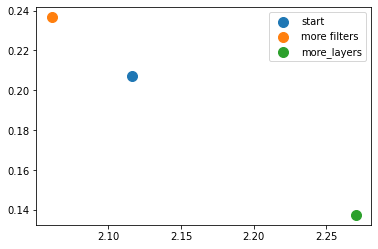

In [35]:
import matplotlib.pyplot as plt


def plot_metrics(x):
  plt.scatter(x['loss'], x['accuracy'], label=x['method'], s=100)
  plt.legend()

df_metrics.apply(lambda x: plot_metrics(x), axis=1)

4. сравнить с точностью полносвязной сети для этой выборки*